In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from py_pulse import *
from pulse_helper import *

In [2]:
file_name = "Pulse_Manager.xlsx"
sheet_1 = "Pulse_Queue"
sheet_2 = "Pulse_Definition"

# pulse_queue = pd.read_excel(file_name, sheet_name=sheet_1)
pulse_definition = pd.read_excel(file_name, sheet_name=sheet_2)
pulse_names = pulse_definition.columns[1:]
pulse_list = []
pulse_dic = {}
pulse_queue = Pulse_Queue(pd.read_excel(file_name, sheet_name=sheet_1))

for name in pulse_names:
    pulse_list.append(Pulse(name, pulse_definition[name]))
    pulse_dic.update({name: Pulse(name, pulse_definition[name])})

channels = load_channels(pulse_queue, pulse_dic, 28)

In [3]:
print(timeline_merge(channels[2].timeline))

[[ 80 230]]


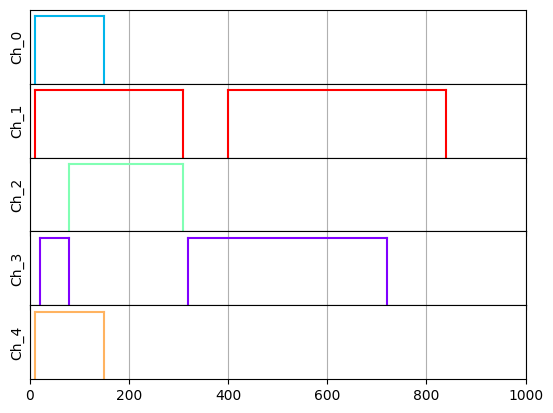

In [4]:
channel_plotter(channels, 5)

In [5]:
on_time(channels)

{'10': [0, 1, 4], '400': [1], '80': [2], '20': [3], '320': [3]}

In [6]:
off_time(channels)

{'150': [0, 4], '310': [1, 2], '840': [1], '80': [3], '720': [3]}

In [7]:
on = np.array(list(on_time(channels).keys()), dtype=int)
off = np.array(list(off_time(channels).keys()), dtype=int)

In [8]:
on = np.sort(on)
off = np.sort(off)

In [9]:
for j in range(len(on)):
    i = on[j]
    k = off[j]
    print(channel_on_off("Turn on channels", "DIO_1", str(on_time(channels)[str(i)]), "on", str(i)))
    print(channel_on_off("Turn on channels", "DIO_1", str(off_time(channels)[str(k)]), "off", str(k)))

hvis.sync_while("Turn on channels",DIO_1,[0, 1, 4],"on", delay=10)
hvis.sync_while("Turn on channels",DIO_1,[3],"off", delay=80)
hvis.sync_while("Turn on channels",DIO_1,[3],"on", delay=20)
hvis.sync_while("Turn on channels",DIO_1,[0, 4],"off", delay=150)
hvis.sync_while("Turn on channels",DIO_1,[2],"on", delay=80)
hvis.sync_while("Turn on channels",DIO_1,[1, 2],"off", delay=310)
hvis.sync_while("Turn on channels",DIO_1,[3],"on", delay=320)
hvis.sync_while("Turn on channels",DIO_1,[3],"off", delay=720)
hvis.sync_while("Turn on channels",DIO_1,[1],"on", delay=400)
hvis.sync_while("Turn on channels",DIO_1,[1],"off", delay=840)


In [46]:
combined_on = np.array([[j, 1] for j in on])
combined_off = np.array([[j, 0] for j in off])
combined = np.vstack([combined_on, combined_off])
combined = combined[np.argsort(combined[:, 0])]

In [47]:
on

array([ 10,  20,  80, 320, 400])

In [48]:
combined

array([[ 10,   1],
       [ 20,   1],
       [ 80,   1],
       [ 80,   0],
       [150,   0],
       [310,   0],
       [320,   1],
       [400,   1],
       [720,   0],
       [840,   0]])

In [59]:
delay = 0
old = 0
for command in combined:
    i = command[0]
    if(i-delay==0):
        command_delay = 10
        delay = delay + 10
    else:
        command_delay = i - delay

    if command[1] == 1:
        print(channel_on_off("Turn on channels", "DIO_1", str(on_time(channels)[str(i)]), "on", str(command_delay)))
    else:
        print(channel_on_off("Turn on channels", "DIO_1", str(off_time(channels)[str(i)]), "off", str(command_delay)))
    delay = delay +command[0] - old
    old = command[0]

hvis.sync_while("Turn on channels",DIO_1,[0, 1, 4],"on", delay=10)
hvis.sync_while("Turn on channels",DIO_1,[3],"on", delay=10)
hvis.sync_while("Turn on channels",DIO_1,[2],"on", delay=60)
hvis.sync_while("Turn on channels",DIO_1,[3],"off", delay=10)
hvis.sync_while("Turn on channels",DIO_1,[0, 4],"off", delay=60)
hvis.sync_while("Turn on channels",DIO_1,[1, 2],"off", delay=150)
hvis.sync_while("Turn on channels",DIO_1,[3],"on", delay=10)
hvis.sync_while("Turn on channels",DIO_1,[1],"on", delay=60)
hvis.sync_while("Turn on channels",DIO_1,[3],"off", delay=300)
hvis.sync_while("Turn on channels",DIO_1,[1],"off", delay=100)


In [39]:
a = np.array([1,2,4,6,5,3])
b = np.array([[1,2], [2,3], [3,1]])

b[np.argsort(b[:,1])]

array([[3, 1],
       [1, 2],
       [2, 3]])